# Sumarização

- Importações necessárias
- dataset ANIMAL-POSE DATASET
  - Imagens e keypoints
- Filtragem e processamento de imagens de bovinos
  - Pré-processamento
- Analise exploratória
  - Analise e resultados
  - Representações gráficas

# Importações

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd # biblioteca oara análise de dados
import numpy as np # biblioteca para uso de grandes matrizes e arrays
import matplotlib.pyplot as plt # módulo pyplot de matplotlib para plotar gráficos
import os # módulo os para interação com o sistema operacional para manipular arquivos
import json # módulo json para cod
from PIL import Image, ImageDraw, ImageFilter, ImageChops, ImageEnhance # usado para abrir, manipular e salvar formatos diferentes de arquivos img
import seaborn as sns # biblioteca para gráficos estatísticos

# Dataset ANIMAL-POSE DATASET

Appós o download do dataset e ter descompactado o arquivo .zip, o dataset deve se encontrar no diretório drive e ser referenciado como é mostrado abaixo:

In [ ]:
images_path = "/content/drive/MyDrive/animalpose_keypoint_new/images/images"
keypoints_path = "/content/drive/MyDrive/animalpose_keypoint_new/keypoints.json"

Inicia-se com um código que consiste em duas funções principais utilizadas para carregar dados de imagens e keypoints(coordenadas da imagem). A primeira função, load_all_images, é responsável por carregar todas as imagens de um diretório indicado por path. A segunda função, load_keypoints_as_dataframe, carrega keypoints de um arquivo JSON e os transforma em DataFrames do Pandas para facilitar a manipulação e análise dos dados.

Obs: a partir desse código é utilizado a estrutura try & expect, semlehante ao try-catch do JAVA e isso se deve por conta de testes realizados e que passaram por muitos erros de rodagem, sendo uma implementação comum ao longo desse processo.

In [100]:
def load_all_images(images_path):
    # Lista de arquivos de imagem, filtrando por extensões de arquivo
    image_files = [os.path.join(images_path, img) for img in os.listdir(images_path)
                   if img.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif'))]
    images = []
    for image_file in image_files:
    # Abre cada arquivo de imagem e converte para o formato RGB antes de adicionar à lista de imagens
        try:
            with Image.open(image_file) as img:
                images.append(np.array(img.convert('RGB')))
        except IOError:
            print(f"Erro no carregamento: {image_file}")
    # Retorna uma lista de imagens e a lista de caminhos dos arquivos de imagem.
    return images, image_files

def load_keypoints_as_dataframe(keypoint_path):
    try:
        with open(keypoint_path, 'r') as file:
          # Carrega os dados JSON do arquivo especificado
            keypoints_data = json.load(file)
        # Extrai as seções 'annotations' e 'categories' dos dados JSON
        annotations = keypoints_data.get('annotations', [])
        categories = keypoints_data.get('categories', [])

        # Converte as listas de annotations e categories em DataFrames do Pandas
        annotations_df = pd.DataFrame(annotations)
        categories_df = pd.DataFrame(categories)
        # Retorna os DataFrames criados
        return annotations_df, categories_df
    except (json.JSONDecodeError, FileNotFoundError) as e:
        print(f"keypoints não carregados: {e}")

Verificações com o objetivo de observar se o arquivo existe e sobretudo, se keypoints ou dicionário tem ou não suas respectivas imagens

In [ ]:
try:
    with open(keypoints_path, 'r') as file:
      # Carrega os dados JSON do arquivo e atribui ao dicionário keypoints
        keypoints = json.load(file)
    # Verifica se 'images' está no dicionário
    if "images" not in keypoints:
        print("keypoints não tem images")
except FileNotFoundError:
    print("Arquivo inexistente")
    # Atribui um dicionário vazio à variável 'keypoints' para evitar erros de referência
    keypoints = {}
except json.JSONDecodeError:
    print("Erro")
    keypoints = {}


In [ ]:
keypoints.keys() # útil para verificação de quais dados estão presentes após a tentativa de carregamento do arquivo

dict_keys(['images', 'annotations', 'categories', 'info'])

In [ ]:
annotations_df, categories_df = load_keypoints_as_dataframe(keypoints_path) # passa o caminho do arquivo JSON e atribui os resultados a 'annotations_df' e 'categories_df'

Visualizalçao dos dados, filtrando pelos primeiros com .head() e pelos últimos com .tail() das anotações e categorias.

In [ ]:
annotations_df.head()

,image_id,bbox,keypoints,num_keypoints,category_id
0,1,"[123, 115, 379, 275]","[[193, 216, 1], [160, 217, 1], [174, 261, 1], ...",20,1
1,2,"[25, 34, 419, 271]","[[330, 84, 1], [245, 91, 1], [290, 137, 1], [3...",20,3
2,3,"[54, 50, 285, 262]","[[275, 102, 1], [247, 105, 1], [269, 156, 1], ...",20,4
3,4,"[100, 96, 355, 324]","[[0, 0, 0], [327, 161, 1], [350, 192, 1], [333...",20,4
4,5,"[71, 252, 216, 314]","[[103, 269, 1], [86, 269, 1], [92, 284, 1], [1...",20,5


In [ ]:
annotations_df.tail()

,image_id,bbox,keypoints,num_keypoints,category_id
6112,4604,"[33, 63, 547, 559]","[[119, 140, 1], [0, 0, 0], [48, 183, 1], [158,...",20,3
6113,4605,"[119, 50, 729, 594]","[[656, 113, 1], [0, 0, 0], [580, 181, 1], [683...",20,3
6114,4606,"[105, 38, 565, 598]","[[250, 91, 1], [166, 91, 1], [214, 148, 1], [2...",20,3
6115,4607,"[65, 54, 263, 202]","[[245, 93, 1], [210, 94, 1], [232, 115, 1], [2...",20,3
6116,4608,"[31, 68, 163, 286]","[[99, 97, 1], [72, 99, 1], [86, 119, 1], [114,...",20,3


In [ ]:
categories_df.head()

,supercategory,id,name,keypoints,skeleton
0,animal,1,dog,"[left_eye, right_eye, nose, left_ear, right_ea...","[[0, 1], [0, 2], [1, 2], [0, 3], [1, 4], [2, 1..."
1,animal,2,cat,"[left_eye, right_eye, nose, left_ear, right_ea...","[[0, 1], [0, 2], [1, 2], [0, 3], [1, 4], [2, 1..."
2,animal,3,sheep,"[left_eye, right_eye, nose, left_ear, right_ea...","[[0, 1], [0, 2], [1, 2], [0, 3], [1, 4], [2, 1..."
3,animal,4,horse,"[left_eye, right_eye, nose, left_ear, right_ea...","[[0, 1], [0, 2], [1, 2], [0, 3], [1, 4], [2, 1..."
4,animal,5,cow,"[left_eye, right_eye, nose, left_ear, right_ea...","[[0, 1], [0, 2], [1, 2], [0, 3], [1, 4], [2, 1..."


In [ ]:
categories_df.tail()

,supercategory,id,name,keypoints,skeleton
0,animal,1,dog,"[left_eye, right_eye, nose, left_ear, right_ea...","[[0, 1], [0, 2], [1, 2], [0, 3], [1, 4], [2, 1..."
1,animal,2,cat,"[left_eye, right_eye, nose, left_ear, right_ea...","[[0, 1], [0, 2], [1, 2], [0, 3], [1, 4], [2, 1..."
2,animal,3,sheep,"[left_eye, right_eye, nose, left_ear, right_ea...","[[0, 1], [0, 2], [1, 2], [0, 3], [1, 4], [2, 1..."
3,animal,4,horse,"[left_eye, right_eye, nose, left_ear, right_ea...","[[0, 1], [0, 2], [1, 2], [0, 3], [1, 4], [2, 1..."
4,animal,5,cow,"[left_eye, right_eye, nose, left_ear, right_ea...","[[0, 1], [0, 2], [1, 2], [0, 3], [1, 4], [2, 1..."


# Filtragem e processamento de imagens de bovinos

Nessa seção, o código se concentra na filtragem e processamento de imagens de bovinos a partir do dataset com annotations e category. O processo envolve a seleção de anotações e identificação de imagens únicas, além do carregamento das imagens correspondentes.

In [ ]:
def select_annotations_by_category(annotations_df, category_id):
    # Seleciona anotações que correspondem a um dado category_id
    filtered_annotations = annotations_df.loc[annotations_df['category_id'] == category_id]
    return filtered_annotations

In [ ]:
cow = select_annotations_by_category(annotations_df, 5) # Utiliza a função definida para selecionar anotações de bovinos sendo que 5 representa essa classe animal

In [ ]:
cow.shape # exibição do tamanho

(842, 5)

-----------------------------------------------------------------

In [45]:
# Extrai os identificadores únicos das imagens das anotações filtradas
image_id = cow['image_id'].unique()

# Filtra as linhas no DataFrame 'cow' para manter apenas entradas únicas com base no image_id
unique_image_rows = cow.drop_duplicates(subset=['image_id'])

In [ ]:
def filter_image_ids(annotations_df):
  # Filtra duplicatas
    unique_annotations = annotations_df.drop_duplicates(subset='image_id')
    return unique_annotations

In [48]:
def load_filtered_images(images_path, filtered_keypoints):
  # Função para carregar imagens, utilizando os nomes de arquivos das anotações filtradas
    images, image_files = [], []
    for img_data in filtered_keypoints:
        img_path = os.path.join(images_path, img_data)
        # Abre e converte a imagem para o formato RGB antes de adicioná-la à lista
        if os.path.isfile(img_path):
            with Image.open(img_path) as img:
                images.append(np.array(img.convert('RGB')))
                image_files.append(img_path)
    return images, image_files

In [51]:
len(filtered_images) # Calcula o comprimento da lista de imagens filtradas

533

## Pré-processamento

Aqui trata-se do pré-processamento de imagens utilizando uma série de filtros indicados por meio dos comentários presentes. O código aplica um desfoque gaussiano, uma máscara de nitidez (unsharp mask), e realça o contraste das imagens. Ele também inclui visualizações para comparar os efeitos dos filtros aplicados. Este tipo de processamento é útil para preparar imagens para análises subsequentes, melhorando a qualidade visual e destacando características importantes.

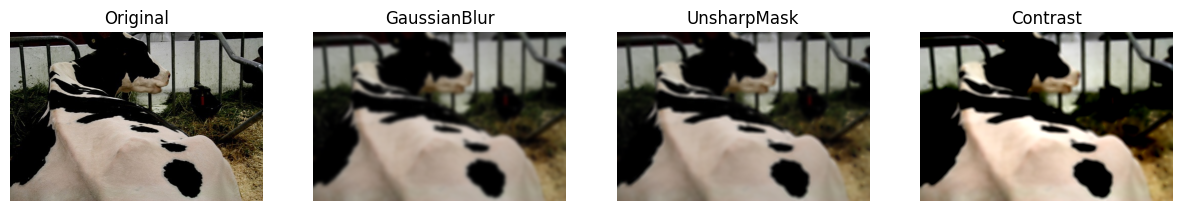

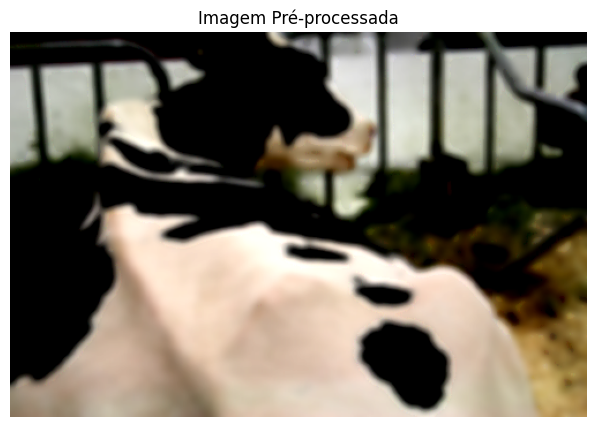

In [101]:
def preprocess_images(images):
    preprocessed_images = []
    for filter_img, img in enumerate(images):
      # Converte um array de imagem numpy em uma imagem PIL para aplicação de filtros
        pil_image = Image.fromarray(img)

        # Para a primeira imagem, cria uma figura para visualizar o efeito dos filtros
        if filter_img == 0:
            plt.figure(figsize=(15, 10))

        original = pil_image
         # Aplica filtro de desfoque gaussiano
        gaussian_blur = original.filter(ImageFilter.GaussianBlur(3))
        # Aplica unsharp mask após o desfoque gaussiano
        unsharp_mask = gaussian_blur.filter(ImageFilter.UnsharpMask(radius=2, percent=150, threshold=3))

         # Realça o contraste da imagem resultante do unsharp mask
        enhancer = ImageEnhance.Contrast(unsharp_mask)
         # Adiciona a imagem processada à lista de imagens pré-processadas
        contrast_enhanced = enhancer.enhance(1.5)

        # Adiciona a imagem processada à lista de imagens pré-processadas
        preprocessed_images.append(contrast_enhanced)

        if filter_img == 0:
          # exibe cada etapa das imagens
            filters = [("Original", original), ("GaussianBlur", gaussian_blur),
                       ("UnsharpMask", unsharp_mask), ("Contrast", contrast_enhanced)]
            for i, (title, image) in enumerate(filters, 1):
                plt.subplot(1, len(filters), i)
                plt.imshow(image)
                plt.title(title)
                plt.axis('off')
            plt.show()

    return preprocessed_images

preprocessed_images = preprocess_images(filtered_images)


plt.figure(figsize=(15, 5))
plt.imshow(preprocessed_images[0])  # imagem processada
plt.title('Imagem Pré-processada')
plt.axis('off')
plt.show()


## Analise exploratória

Esta seção foca na análise exploratória de imagens e keypoints de bovinos, visando identificar padrões e distribuições das anotações. As análises incluem visualizações diretas das imagens com keypoints marcados, distribuição das quantidades de anotações por imagem e a relação entre categorias e o número de keypoints.

Começamos pelo conteúdo abaixo que é todo o conjunto de imagem de bovinos disponíveis e que foi utilizado no processo anterior. É importante destacar que dependendo da rodagem em CPU ou GPU, está visualização pode e deve ser interrompida devido a limitações, já que a quantidade de imagens é grande.

O mapeamento do dataset é composto por:
1: 'Gato',
2: 'Cachorro',
3: 'Cavalo',
4: 'Ovelha',
5: 'Bovino'


Aqui estamos trabalhando com bovino, ou seja, id 5. O dataset possui um total quantidade de bovinos (842, 5) ou 842 imagens antes do pré-processamento, após esse processo, possui um total de 533 imagens.

Obs: descomente essa célula e rode, porém , atente-se que nem todas as imagens serão renderizadas

In [107]:
# # Itera sobre pares de imagens e seus keypoints correspondentes
# for image, keypoints in zip(filtered_images, filtered_keypoints):
#    # Configura o tamanho da figura para visualização
#     plt.figure(figsize=(10, 10))
#     plt.imshow(Image.fromarray(image))
#     # Verifica se há keypoints e se cada keypoint contém exatamente duas coordenadas (x, y)
#     if keypoints and all(len(kp) == 2 for kp in keypoints):
#         xs, ys = zip(*keypoints)
#         # Plota os keypoints sobre a imagem
#         plt.scatter(xs, ys, color='red', marker='x')
#     plt.axis('off')
#     plt.show()

A partir dessa visualização, tem confirmado a filtragem apenas de bovinos. Desse modo, incia-se uma análise mais detalhada e por meio de gráficos ilustrativos dos resultados. Primeiramente, é mostrado as 10 imagens com mais anotações, podendo ser visualizada abaixo.

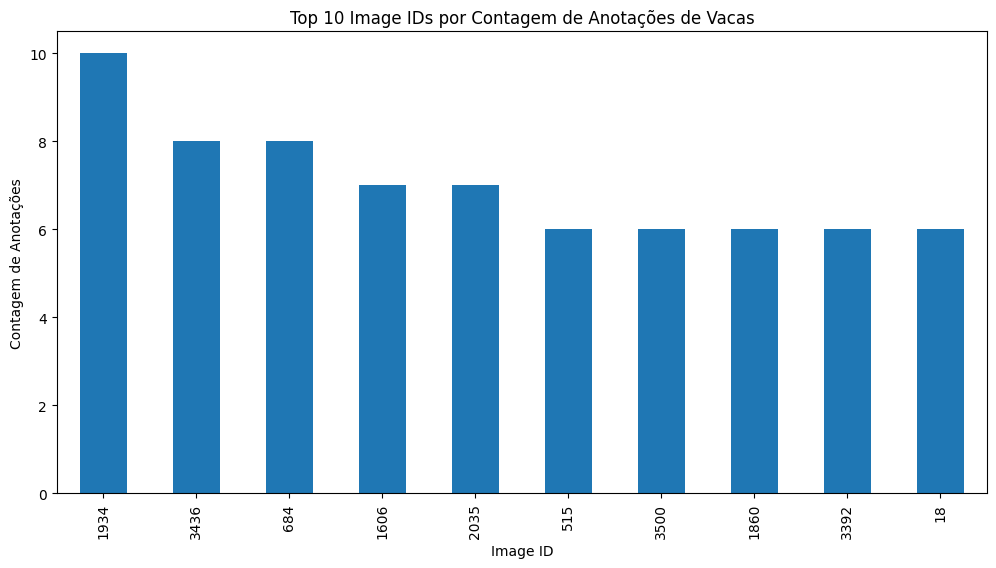

In [59]:
# Mostrar apenas os top 10 image_id com mais anotações
top_annotation_counts = annotation_counts.head(10)

plt.figure(figsize=(12, 6))
top_annotation_counts.plot(kind='bar')
plt.title('Top 10 Image IDs por Contagem de Anotações de Bovinos')
plt.xlabel('Image ID')
plt.ylabel('Contagem de Anotações')
plt.show()


Este gráfico mostra a contagem de anotações associadas a imagens específicas de bovinos, identificadas por seus IDs de imagem. Cada barra representa um ID de imagem diferente, e a altura de cada barra indica o número de anotações para essa imagem específica.


Os IDs das imagens estão listados no eixo horizontal (x), e as contagens de anotações estão no eixo vertical (y). Os IDs de imagem mostrados são 1934, 3436, 684, 1606, 2035, 515, 3500, 1860, 3392 e 18, com contagens de anotações variando em uma faixa próxima, com a maioria das barras mostrando entre 6 a 9 anotações por imagem. A barra mais alta está ligeiramente acima de 9, enquanto a mais baixa está um pouco abaixo de 6, sendo algo útil para visualizar quais imagens de bovinos têm a maior quantidade de anotações.

Agora neste segundo gráfico ao invés de mostrar a contagem, mostra a distribuição do número de anotações por imagem. O gráfico exibe no eixo horizontal (x) a "Contagem de Anotações" e no eixo vertical (y) a "Frequência" de imagens com essas contagens específicas. Cada barra do histograma representa o número de imagens que têm uma determinada contagem de anotações, variando de 0 a 10 anotações.


A primeira barra, que é a mais alta, indica uma alta frequência de imagens com apenas 2 anotações. As barras subsequentes mostram uma diminuição significativa na frequência à medida que o número de anotações por imagem aumenta. Isso sugere que a maioria das imagens tem poucas anotações.

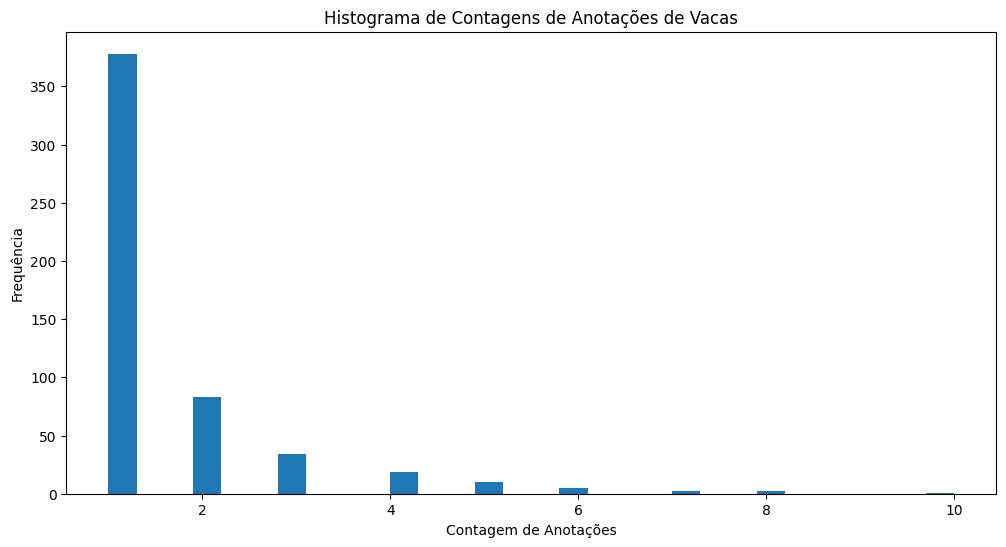

In [62]:
plt.figure(figsize=(12, 6))
annotation_counts.plot(kind='hist', bins=30)
plt.title('Histograma de Contagens de Anotações de Vacas')
plt.xlabel('Contagem de Anotações')
plt.ylabel('Frequência')
plt.show()


Já este gráfico é um boxplot que apresenta a distribuição do número de keypoints por categoria, tendo uma análise visual de como os keypoints são distribuídos em diferentes categorias dentro do dataset. O boxplot é muito útil em ajudar a identificar variabilidade, mediana e outliers dentro das categorias.

O mostra cinco categorias no eixo horizontal (x) e o número de keypoints no eixo vertical (y). As categorias são representadas numericamente de 1 a 5. Como é usado boxplots para ilustrar a distribuição do número de keypoints em cada categoria, é indicado a mediana na linha dentro do boxplot e a variabilidade dos dados.

Aqui todas as categorias apresentam uma distribuição muito estreita de keypoints, com a mediana e os quartis muito próximos uns dos outros, indicando baixa variabilidade dentro de cada categoria. Também não é possível ver sinais de outliers e todos os boxplots parecem ter uma variação mínima, indicando que cada categoria tem um número quase constante de keypoints.

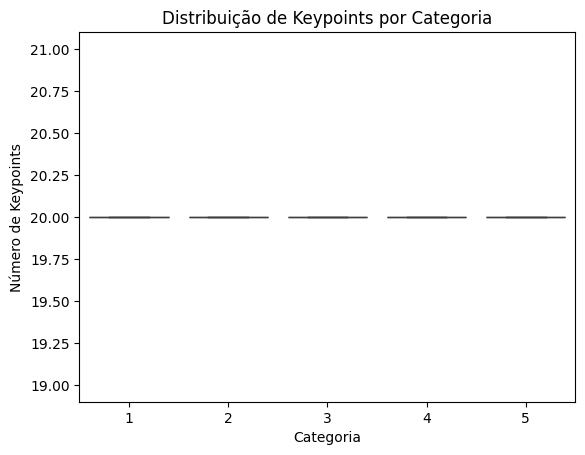

In [68]:
sns.boxplot(x='category_id', y='num_keypoints', data=annotations_df)
plt.title('Distribuição de Keypoints por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Número de Keypoints')
plt.show()


Por último, há uma representação visual da distribuição da média de brilho para cada um dos canais de cor (vermelho, verde e azul) ou mais conhecido como RGB. O histograma a seguir mostra como os valores de brilho variam dentro dessas imagens, o que é muito útil para ajustes de cor ou para avaliar a qualidade das imagens.

[[109.76407186 101.24538922  87.68280838]
 [151.35277184 143.90121845 141.05358738]
 [112.285216   107.94048    113.66860267]
 ...
 [123.36886667 138.10288333 104.35198333]
 [144.11193974 141.32043315 123.53088512]
 [153.32863333 181.51367778 176.39113333]]


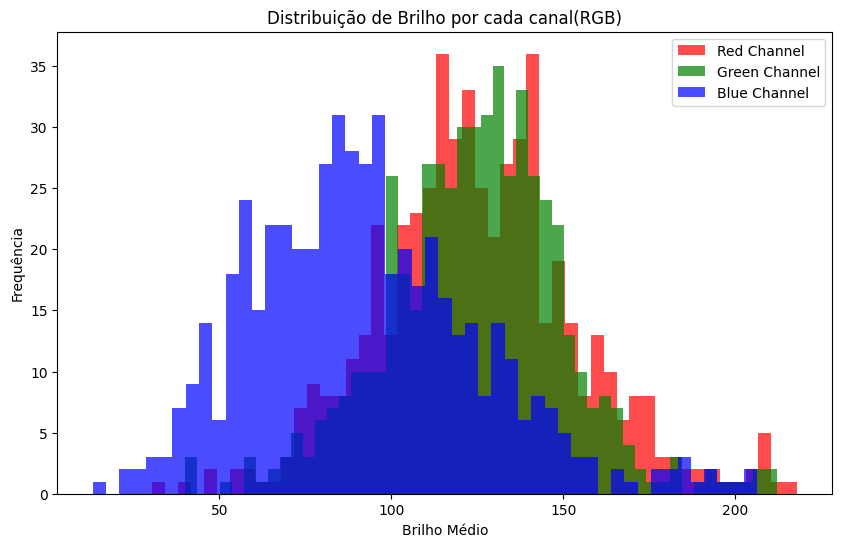

In [106]:
def brightness(images):
    # Calcula a média ao longo da altura e largura, mantendo a dimensão dos canais de cor
    brightness = [np.mean(img, axis=(0, 1)) for img in images]
    return np.array(brightness)

def plot_brightness(brightness):
    # faz a plotagem da distribuição do brilho pra cada canal
    # Cria um histograma para cada canal de cor
    plt.figure(figsize=(10, 6))
    for i, color in enumerate(['Red', 'Green', 'Blue']):
        plt.hist(brightness[:, i], bins=50, color=color, alpha=0.7, label=f'{color} Channel')
    plt.title('Distribuição de Brilho por cada canal(RGB)')
    plt.xlabel('Brilho Médio')
    plt.ylabel('Frequência')
    plt.legend()
    plt.show()

# Calcula a média dos pixels de cada imagem
distribution = brightness(preprocessed_images)
print(distribution)
plot_brightness(distribution)


Desse modo, pode-se afirmar que:

Canal Vermelho(R): Mostra uma distribuição que se estende em valores baixos a moderados de brilho, com a maioria dos valores concentrada em torno de 100 a 150. Há poucas imagens com valores muito altos de brilho neste canal.

Canal Verde(G): Apresenta uma distribuição similar ao canal vermelho, mas com uma concentração maior em torno do meio da faixa de brilho com cerca de 100 a 140. Este canal tem menos variação nos valores altos em comparação com o canal vermelho.

Canal Azul(B): Tem uma distribuição mais ampla que os outros dois canais, com uma quantidade significativa de imagens mostrando valores baixos de brilho com menos de 100 e vai até valores mais altos em torno de 180.

Observações:

Variação de Brilho: O canal azul apresenta maior variação em seus valores de brilho, o que pode indicar características específicas das imagens ou diferenças na iluminação ou no ambiente de captura.

Frequência: As frequências no gráfico mostram que há mais consistência e menor variação nos valores de brilho dos canais vermelho e verde, enquanto o azul é mais amplo.